# Problem Set 3 - UMANG SEHGAL

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa
program](http://en.wikipedia.org/wiki/Oportunidades), a government
social assistance program in Mexico. This program, as well as the
details of its impact, are described in the paper "[School subsidies
for the poor: evaluating the Mexican Progresa poverty
program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)",
by Paul Shultz (available on Canvas).  The data
(progresa_sample.csv.gz) is available on canvas
in files/data.

Please read the paper to familiarize yourself with
the PROGRESA program before beginning this problem set, so you have a
rough sense of where the data come from and how they were
generated. If you just proceed into the problem set without
understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic
econometric techniques that you are learning in class to measure the
impact of Progresa on secondary school enrollment rates, in particular
differences-in-differences.  Your task is to **estimate the impact of
_progresa_ subsidies on the school attendance**.  Note: this asks to
estimate a causal effect.

The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from
Canvas. The data are actual data collected to evaluate the impact of
the Progresa program.  In this file, each row corresponds to an
observation taken for a given child for a given year. There are two
years of data (1997 and 1998), and just under 40,000 children who are
surveyed in both years.  For each child-year observation, the
following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey (=1)|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = "pobre", not poor = "no pobre"|
|progresa |treatment = "basal", control = "0"|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|enrolled in school in 1997 (=1) |

## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Report summary statistics (mean, standard deviation, and number of missings) for all of
the demographic variables in the dataset (i.e., everything except
year, folnum, village).  Present the actual levels for 'progresa' and
'poor'.  Do these fit with the documentation above?

Present these in a single table alphabetized
by variable name. Do NOT simply expect the grader to scroll through
your output!

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
from pylab import *
%matplotlib inline

In [28]:
df = pd.read_csv("/home/umang-uw/Downloads/progresa_sample.csv")
#Dropping off the columns which are not needed for summary stats.
temp = df.drop(['year','folnum','village'], axis=1)
temp.describe(include = 'all').loc[['mean','std','count']]

,sex,indig,dist_sec,sc,grc,fam_n,min_dist,dist_cap,poor,progresa,hohedu,hohwag,welfare_index,hohsex,hohage,age,grc97,sc97
mean,0.512211,0.298324,2.418910,0.819818,3.963537,7.215715,103.447520,147.674452,NaN,NaN,2.768104,586.985312,690.346564,0.925185,44.436717,11.366460,3.705372,0.813922
std,0.499854,0.457525,2.234109,0.384342,2.499063,2.352900,42.089441,76.063134,NaN,NaN,2.656106,788.133664,139.491130,0.263095,11.620372,3.167744,2.572387,0.389172
count,77226.000000,76950.000000,77250.000000,68797.000000,70701.000000,77250.000000,77250.000000,77250.000000,77250,77250,77250.000000,77250.000000,77040.000000,77230.000000,77240.000000,77250.000000,77250.000000,73378.000000


### 1.2 Differences at baseline?
Now let's investigate the differences in baseline.  Are the baseline (1997) demographic characteristics **for the poor**
different in treatment and control villages?

I suggest you to use a T-Test to
determine whether there is a statistically significant difference in
the average values of each of the variables in the dataset. Focus only
on the data from 1997 for poor.

Present your results in a single table with the following columns and 14 (or so) rows:

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|


In [3]:
#Convert Categorical variables to Numeric
df.loc[df.progresa == '0', 'progresa'] = 0
df.loc[df.progresa == 'basal', 'progresa'] = 1
df.loc[df['poor'] == 'pobre', 'poor'] = 1
df.loc[df['poor'] ==  'no pobre', 'poor'] = 0

ttest_table = pd.DataFrame(columns = ['Variable name', 'Average value (Treatment villages)', 'Average value (Control villages)', 'Difference (Treat - Control)', 'p-value'])
control =  df[(df['poor'] == 1) & (df['year'] == 97) & (df.progresa == 0)]
treatment =  df[(df['poor'] == 1) & (df['year'] == 97) & (df.progresa == 1)]


dataset_variables =  list(temp.columns.values)
for i in dataset_variables:
        ttest_table.at[dataset_variables.index(i), 'Variable name'] = i
        ttest_table.at[dataset_variables.index(i), 'Average value (Treatment villages)'] = treatment[i].mean()
        ttest_table.at[dataset_variables.index(i), 'Average value (Control villages)' ] = control[i].mean()
        test = stats.ttest_ind(treatment[i][~pd.isnull(treatment[i])], control[i][~pd.isnull(control[i])] )
        ttest_table.at[dataset_variables.index(i), 'Difference (Treat - Control)'] =   test.statistic
        ttest_table.at[dataset_variables.index(i), 'p-value'] =   test.pvalue
        
ttest_table


,Variable name,Average value (Treatment villages),Average value (Control villages),Difference (Treat - Control),p-value
0,sex,0.519317,0.505052,2.50669,0.0121917
1,indig,0.325986,0.332207,-1.16171,0.24536
2,dist_sec,2.45312,2.50766,-2.10043,0.0356984
3,sc,0.822697,0.815186,1.66874,0.0951781
4,grc,3.5316,3.54305,-0.400196,0.689015
5,fam_n,7.28133,7.30247,-0.794167,0.427104
6,min_dist,107.153,103.238,8.20658,2.35831e-16
7,dist_cap,150.829,153.77,-3.33908,0.000841501
8,poor,1,1,NaN,NaN
9,progresa,1,0,inf,0


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 

Yes, some variables like sex, dist_sec, min_dist, dist_cap etc. have statistically significant differences in the average values at the baseline!

* B: Why does it matter if there are differences at baseline?

The difference would have us not find casuality between the treatment and control and thus randomization would not serve the purpose.

* C: What does this imply about how to measure the impact of the treatment?

To measure the impact we would need to find the diff between the outcomes of treatment by using the double diff method.

*Discuss your results here*

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average
enrollment rate in 1997. Create a scatterplot that shows this
relationship. What do you notice?

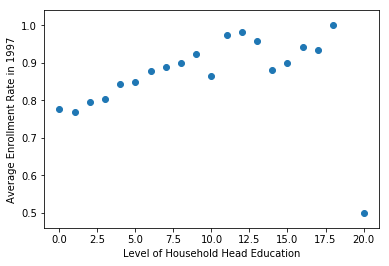

In [4]:
avg = pd.DataFrame(df[df['year']==97].groupby('hohedu').mean()['sc'])
avg.reset_index(level = 0, inplace = True)

#ScatterPlot
plt.scatter(list(avg['hohedu']),list(avg['sc']))
plt.xlabel("Level of Household Head Education")
plt.ylabel("Average Enrollment Rate in 1997")
plt.show()

*Result: Average enrollment rates increase steadily from around 0.76 to 0.94 for household head education years between 0 and 9. When it touches 10, we see a slight drop in average enrollment rates to 0.86 and the from year 11 onwards it starts increasing again steadily. *

### 1.5 Graphical exploration, part 2

Create a histogram of village enrollment rates **among poor households
in treated villages**, before and after treatment.  Specifically, for
each village, calculate the average rate of enrollment of poor
households in treated villages in 1997, then compute the average rate
of enrollment of poor households in treated villages in 1998. Create
two separate histograms showing the distribution of these average
enrollments rates, one histogram for 1997 and one histogram for
1998. On each histogram, draw a vertical line that intersects the
x-axis at the average value (across all households). Does there appear
to be a difference? Is this difference statistically significant?

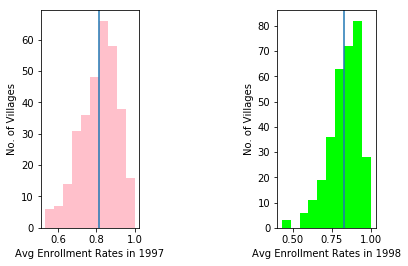

Ttest_indResult(statistic=-2.0157134865156379, pvalue=0.04424870036572115)


In [5]:
#1997
village97 = df[(df['poor'] == 1) & (df['year'] == 97) & (df['progresa'] == 1)].groupby('village').mean()
village97.reset_index(level=0, inplace = True)

#1997 - histogram
fig = plt.figure()
ax1 = fig.add_subplot(131)
ax1.hist(village97['sc'], color = "pink")
xlabel("Avg Enrollment Rates in 1997")
ylabel("No. of Villages")
plt.axvline(village97['sc'].mean())

#1998
village98 = df[(df['poor'] == 1) & (df['year'] == 98) & (df['progresa'] == 1)].groupby('village').mean()
village98.reset_index(level=0, inplace = True)

#1998 - Histogram
ax2 = fig.add_subplot(133)
ax2.hist(village98['sc'], color = 'lime')
xlabel("Avg Enrollment Rates in 1998")
ylabel("No. of Villages")
plt.axvline(village98['sc'].mean())
plt.show()

#Statistaical Significance using the T-Test
test = stats.ttest_ind(village97['sc'][~pd.isnull(village97['sc'])], village98['sc'][~pd.isnull(village98['sc'])])
print(test)

*The mean of the average enrollment rates of villages in 1997 and 1998 is mostly the same.In order to validate the statistical significance, the t-test gave the Pvalue to be 0.044 indicating the statisical significance by a small value.*

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on
the social and economic outcomes of individuals in Mexico. We will
focus on the impact of the program on the poor (those with
poor=='pobre'), since only the poor were eligible to receive the
PROGRESA assistance.

### 2.1 Cross-Sectional Estimator: T-test

Begin by estimating the impact of Progresa using "simple differences."
Restricting yourself to data from 1998 (after treatment), calculate
the average enrollment rate among **poor** households in the Treatment
villages and the average enrollment rate among **poor** households in
the control villages. Use a t-test to determine if this difference is
statistically significant. What do you conclude?

In [6]:
treatment98 = df[(df['poor'] == 1) & (df['year'] == 98) & (df['progresa'] == 1)]
control98 = df[(df['poor'] == 1) & (df['year'] == 98) & (df['progresa'] == 0)]

treatment98_average = treatment98['sc'].mean()
control98_average = control98['sc'].mean()
print("Treatment average ",treatment98_average)
print("Control average ",control98_average)

#T-Test
test = stats.ttest_ind(control98['sc'][~pd.isnull(control98['sc'])], treatment98['sc'][~pd.isnull(treatment98['sc'])])
print("T Statistic: ",test.statistic)
print("P value: ", test.pvalue)


('Treatment average ', 0.8464791213954308)
('Control average ', 0.807636956730308)
('T Statistic: ', -8.3587205674183735)
('P value: ', 6.636344447523235e-17)


*From the analysis of the enrollment rates in treated and control villages we observe statistically significant differences! *

### 2.2 Cross-Sectional Estimator: Regression

Estimate the effects of Progresa on enrollment using a regression
model, by regressing the 1998 enrollment rates **of the poor** on
treatment assignment.  Do not include any additional control
variables.
Discuss the following:

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

Note: I recommend to use statsmodels.formula.api as this allows to use
convenient R-style formulas and provedes nice summaries of the results.

In [10]:
import statsmodels.formula.api as smf

# 1998 
df98 = df[(df['poor'] == 1) & (df['year'] == 98)]
lm = smf.ols(data=df98, formula='sc ~ progresa').fit()
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Wed, 02 May 2018   Prob (F-statistic):           6.64e-17
Time:                        13:58:49   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8076      0.004    220.676      0.0

*Progresa increases the likelihood of a child enrolling by 0.038 and in the absence of treatment, the average enrollment rates would have been 0.807. However, when the family is subject to treatment, there is an expected increase of 0.038 in the average enrollment rates. 
Also, we cannot reject the null hypothesis about the treatment effects be zero since the differences are statistically significant as p value < 0.05

The counterfactual assumption underlying this regression is that in the absence of treatment, the results in the avg enrollment rates in the treated villages would be equal to the average enrollment rates in the control villages*

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of
relevant control variables. Include, for instance, age, distance to a secondary
school, gender, education of household head, welfare index,
indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [11]:
multiple_lm = smf.ols(formula='sc ~ progresa + sex + indig + dist_sec + fam_n + min_dist + dist_cap + hohedu + hohwag + welfare_index + age + hohage', data=df98).fit()
multiple_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     849.5
Date:                Wed, 02 May 2018   Prob (F-statistic):               0.00
Time:                        13:58:52   Log-Likelihood:                -7541.1
No. Observations:               27263   AIC:                         1.511e+04
Df Residuals:                   27250   BIC:                         1.521e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.4431      0.018     80.855      0.000       1.408       1.478
progresa          0.0337      0.004      8.418      0.000       0.026       0.042
sex               0.0304      0.004      7.847      0.000       0.023       0.038
indig             0.0188      0.005      3.961      0.000       0.009       0.028
dist_sec         -0.0106      0.001    -12.012      0.000      -0.012      -0.009
fam_n             0.0006      0.001      0.727      0.467      -0.001       0.002
min_dist          0.0004   6.34e-05      6.326      0.000       0.000       0.001
dist_cap          0.0002    3.7e-05      5.512      0.000       0.000       0.000
hohedu            0.0079      0.001      9.224      0.000       0.006       0.010
hohwag         -7.23e-07   2.81e-06     -0.257      0.797   -6.24e-06    4.79e-06
welfare_index  2.283e-05   1.82e-05      1.253      0.210   -1.29e-05    5.85e-05
age              -0.0657      0.001    -94.750      0.000      -0.067      -0.064
hohage        -2.299e-05      0.000     -0.118      0.906      -0.000       0.000
==============================================================================
Omnibus:                     2940.375   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3992.254
Skew:                          -0.930   Prob(JB):                         0.00
Kurtosis:                       3.237   Cond. No.                     9.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


Introducing the control factors has changed the point estimate for the treatment effect progress and it has decreased from 0.0388 in the single linear model to 0.0337 in the multiple regression model. 

The introduction of the control variables has improved the standard error on the treatment effect from 0.005 to 0.004.

The interpretation of thr estimate of the intercept value is 1.4431 which is greater than 1 as compared to 0.8076 from the model in 2.2. However, the most prominent factor for the school enrollment is the treatment effect of the progresa fund given to families which has an estimate of 0.0337.

------

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the
difference in 1998 enrollment rates across villages. An alternative
approach would be to compute the treatment effect using a
difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate:

a) the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages

b) the difference (between 1997 and 1998) in enrollment rates among poor households in control villages.

c) The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?

* What is the counterfactual assumption underlying this estimate? 


In [20]:
df97 = df[(df['poor'] == 1) & (df['year'] == 97)]
df98 = df[(df['poor'] == 1) & (df['year'] == 98)]

index = ['Before Treatment', 'After Treatment']
cols = ['Control', 'Treatment']
double_diff = pd.DataFrame(index = index, columns = cols)

treatment98 = df98['sc'][df98.progresa == 1].mean() 
treatment97 = df97['sc'][df97.progresa == 1].mean()
control98 =  df98['sc'][df98.progresa == 0].mean()
control97 =  df97['sc'][df97.progresa == 0].mean()

diff_in_diff = (treatment98 - treatment97) - (control98 - control97)
print "The diff in diff value is: ", diff_in_diff

double_diff.loc["Before Treatment","Control"] = control97
double_diff.loc["After Treatment","Control"] = control98
double_diff.loc["Before Treatment","Treatment"] = treatment97
double_diff.loc["After Treatment","Treatment"] = treatment98

double_diff


The diff in diff value is:  0.0313312803193


,Control,Treatment
Before Treatment,0.815186,0.822697
After Treatment,0.807637,0.846479


*Difference-in-Difference method gives us a value of 0.0313 which is lower then the estimate derived from the earlier simple difference methods that gave an estimate of 0.0388*

### 2.5 Difference-in-Difference, version 2 (regression)

Now use a regression specification to estimate the average treatment
effects of the program in a difference-in-differences
framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in
  interpreting your coefficients and standard errors, and make sure to
  specify exactly what units you are measuring and estimating.

* How do these estimates of the treatment effect compare to the
  estimates based on the simple difference?

* How do these estimates compare to the difference-in-difference
  estimates from 2.4 above? What accounts for these differences?

* What is the counterfactual assumption underlying this regression? 

In [29]:
df.loc[df.progresa == '0', 'progresa'] = 0
df.loc[df.progresa == 'basal', 'progresa'] = 1
df.loc[df['poor'] == 'pobre', 'poor'] = 1
df.loc[df['poor'] ==  'no pobre', 'poor'] = 0
df.loc[df.year == 97, 'post'] = 0
df.loc[df.year == 98, 'post'] = 1
pd.to_numeric(df['progresa'])
pd.to_numeric(df['poor'])
progresa_poor = df[df['poor'] == 1]
dd_lm = smf.ols(formula = 'sc ~ progresa + post + progresa:post + sex + dist_sec  + min_dist + dist_cap + hohedu + age + hohage', data=progresa_poor).fit()
dd_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     2296.
Date:                Wed, 02 May 2018   Prob (F-statistic):               0.00
Time:                        14:49:58   Log-Likelihood:                -16585.
No. Observations:               58344   AIC:                         3.319e+04
Df Residuals:                   58333   BIC:                         3.329e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.4215      0.009    158.822      0.000       1.404       1.439
progresa          0.0031      0.004      0.817      0.414      -0.004       0.010
post              0.0274      0.004      6.321      0.000       0.019       0.036
progresa:post     0.0313      0.005      5.690      0.000       0.020       0.042
sex               0.0331      0.003     12.429      0.000       0.028       0.038
dist_sec         -0.0093      0.001    -15.020      0.000      -0.010      -0.008
min_dist          0.0004   4.37e-05      8.550      0.000       0.000       0.000
dist_cap          0.0003   2.36e-05     10.821      0.000       0.000       0.000
hohedu            0.0072      0.001     12.322      0.000       0.006       0.008
age              -0.0657      0.000   -143.888      0.000      -0.067      -0.065
hohage            0.0002      0.000      1.838      0.066   -1.58e-05       0.000
==============================================================================
Omnibus:                     5488.522   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7205.368
Skew:                          -0.859   Prob(JB):                         0.00
Kurtosis:                       3.110   Cond. No.                     1.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*
Interpretting "progresa:post" interaction coefficient: For families in year 1998 being subjected to the progresa subsidy program, the average enrollment rates would be 0.0313 higher.

The impact estimation of the difference in difference model is lower than that of simple difference. 

The  impact is similar to that of 2.4 except that we have introduced terms of the time consideration and its interaction with the progresa treatment. 

The counterfactual assumption is the trends in treatment group and control group could have been the same in the absence of treatment. 
*

### 2.6 Summary

* Based on all the analysis you have undertaken to date, do you
  believe that Progresa had a causal impact on the enrollment rates of
  poor households in Mexico?  Explain by referring to the methods and
  results above.

*Yes, the progresa program did have causal impact on the enrollment rates of the poor households in Mexico in 1998.
Note that the magnitude of the impact is not veryy high as growth in enrollment rates occurs over time while scale of the program grows and more households are treated with the subsidy.*